In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Scraping From Souq.com Web Site ##
url = 'https://egypt.souq.com/eg-en/shoes/s/?as=1'
html = urlopen(url)

In [3]:
soup = BeautifulSoup(html)
type(soup)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


bs4.BeautifulSoup

In [4]:
all_data = soup.find('div', class_='row collapse content flex-box-grid medium-up-3 tpl-append-results')
all_data

<div class="row collapse content flex-box-grid medium-up-3 tpl-append-results">
<div class="column column-block block-grid-large single-item" data-brand-name="sport" data-category-name="casual &amp; dress shoes" data-ean="2724768542203" data-id-winner-unit="178521500481" data-name="SPORT Fashion Sneakers For Men - Black">
<div class="row">
<div class="columns small-12">
<div class="img-bucket">
<div class="item-discounts">
</div>
<a class="img-link quickViewAction sPrimaryLink" data-id="48421998" data-is_unit="false" href="https://egypt.souq.com/eg-en/sport-fashion-sneakers-for-men-black-48421998/i/" id="quickview-48421998">
<img class="img-size-medium" onerror="this.onerror=null;this.src='https://cf1.s3.souqcdn.com/public/style/img/placeholder_medium.png'" src="https://cf4.s3.souqcdn.com/item/2019/03/19/48/42/19/98/item_L_48421998_5762e5fcd7635.jpg"/>
<div class="overlay">
<button class="button tiny sk-bg-clr1 sk-bg-clr1-eff" type="button">
                        Quick View
         

In [5]:
list_name = []
for h in all_data:
    name = soup.findAll('h6')
    list_name.append(name)
list_name

[[<h6>Make sure to buy your groceries and daily needs</h6>, <h6 class="title">
  <a href="" title=""></a>
  </h6>, <h6 class="title itemTitle">
                    SPORT Fashion Sneakers For Men - Black
                </h6>, <h6 class="title itemTitle">
                    Roma Fashion Sneakers Shoes For Men - White
                </h6>, <h6 class="title itemTitle">
                    Men's Sneakers from ROMA
                </h6>, <h6 class="title itemTitle">
                    Men's Sneakers from ROMA
                </h6>, <h6 class="title itemTitle">
                    Men's Sneakers from ROMA
                </h6>, <h6 class="title itemTitle">
                    Men's Sneakers from ROMA
                </h6>, <h6 class="title itemTitle">
                    Shoes Club Fashion Sneaker For Men - Black
                </h6>, <h6 class="title itemTitle">
                    SPORT Fashion Sneakers For Men - Navy
                </h6>, <h6 class="title itemTitle">
                

In [6]:
## Clean Data ##
import re
clean_list_name = []
for li in list_name:
    str_name = str(li)
    pattern = '<.*?>'
    clean_name = re.sub(pattern, '', str_name)
    clean_list_name.append(clean_name)
clean_list_name

["[Make sure to buy your groceries and daily needs, \n\n, \n                  SPORT Fashion Sneakers For Men - Black\n              , \n                  Roma Fashion Sneakers Shoes For Men - White\n              , \n                  Men's Sneakers from ROMA\n              , \n                  Men's Sneakers from ROMA\n              , \n                  Men's Sneakers from ROMA\n              , \n                  Men's Sneakers from ROMA\n              , \n                  Shoes Club Fashion Sneaker For Men - Black\n              , \n                  SPORT Fashion Sneakers For Men - Navy\n              , \n                  Rimini 2460/01 Canvas Lace-Up Casual Shoes for Men - Black \n              , \n                  SPORT Fashion Sneakers For Men - White\n              , \n                  Roma Fashion Sneakers Shoes For Men - Black\n              , \n                  Rimini 99960-03 Lace-Up Sneakers for Men - Black\n              , \n                  SPORT Fashion Sneakers

In [7]:
df = pd.DataFrame(clean_list_name)
df.head()

,0
0,[Make sure to buy your groceries and daily nee...
1,[Make sure to buy your groceries and daily nee...
2,[Make sure to buy your groceries and daily nee...
3,[Make sure to buy your groceries and daily nee...
4,[Make sure to buy your groceries and daily nee...


In [8]:
df1 = df[0].str.split(',', expand=True)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]
1,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]
2,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]
3,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]
4,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]


In [9]:
df1.shape

(61, 44)

In [10]:
df_clean = df1.drop(df1.index[0:60])
df_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
60,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]


In [11]:
df_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
60,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]


In [12]:
df_clean.index=['0']
df_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]


In [13]:
df_clean.shape

(1, 44)

In [14]:
df_clean.rename(columns={0:'q',1:'w',2:'e',3:'r',4:'t',5:'y',6:'u',7:'i',8:'o',9:'p',10:'a',11:'s',12:'d',13:'f',14:'g',15:'h',16:'j',17:'k',18:'l',19:'z',20:'x',21:'c',22:'v',23:'b',24:'n',25:'m',26:'qq',27:'ww',28:'ee',29:'rr',30:'tt',31:'yy',32:'uu',33:'ii',34:'oo',35:'pp',36:'aa',37:'ss',38:'dd',39:'ff',40:'gg',41:'hh',42:'jj',43:'kk'},inplace=True)

In [15]:
df_clean.head(20)

,q,w,e,r,t,y,u,i,o,p,...,oo,pp,aa,ss,dd,ff,gg,hh,jj,kk
0,[Make sure to buy your groceries and daily needs,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]


In [16]:
df_clean.pop('q')
df_clean.head()

,w,e,r,t,y,u,i,o,p,a,...,oo,pp,aa,ss,dd,ff,gg,hh,jj,kk
0,\n\n,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]


In [17]:
df_clean.pop('w')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,oo,pp,aa,ss,dd,ff,gg,hh,jj,kk
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com,Buying on Souq.com]


In [18]:
df_clean.pop('kk')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,ii,oo,pp,aa,ss,dd,ff,gg,hh,jj
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n\n,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property,Selling on Souq.com


In [19]:
df_clean.pop('jj')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,uu,ii,oo,pp,aa,ss,dd,ff,gg,hh
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,Sponsored Products,\n\n,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account,Intellectual Property


In [20]:
df_clean.pop('hh')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,yy,uu,ii,oo,pp,aa,ss,dd,ff,gg
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches,My Account


In [21]:
df_clean.pop('gg')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,tt,yy,uu,ii,oo,pp,aa,ss,dd,ff
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps,Popular Searches


In [22]:
df_clean.pop('ff')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,rr,tt,yy,uu,ii,oo,pp,aa,ss,dd
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n,\n\n Avail...,Sold by,Help Center,Follow Us,Download our apps


In [23]:
df_clean.pop('dd')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,ee,rr,tt,yy,uu,ii,oo,pp,aa,ss
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n ROMA Fashion Sneakers Fo...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n,\n\n Avail...,Sold by,Help Center,Follow Us


In [24]:
df_clean.pop('ss')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,ww,ee,rr,tt,yy,uu,ii,oo,pp,aa
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n fronti Havan Lace Up Shoe...,\n ROMA Fashion Sneakers Fo...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n,\n\n Avail...,Sold by,Help Center


In [25]:
df_clean.pop('aa')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,qq,ww,ee,rr,tt,yy,uu,ii,oo,pp
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n Shoes Club Fashion Sneake...,\n fronti Havan Lace Up Shoe...,\n ROMA Fashion Sneakers Fo...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n,\n\n Avail...,Sold by


In [26]:
df_clean.pop('pp')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,m,qq,ww,ee,rr,tt,yy,uu,ii,oo
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n Shoes Club Fashion Sneake...,\n Shoes Club Fashion Sneake...,\n fronti Havan Lace Up Shoe...,\n ROMA Fashion Sneakers Fo...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n,\n\n Avail...


In [27]:
df_clean.pop('oo')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,n,m,qq,ww,ee,rr,tt,yy,uu,ii
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n Shoes Club Fashion Sneake...,\n Shoes Club Fashion Sneake...,\n Shoes Club Fashion Sneake...,\n fronti Havan Lace Up Shoe...,\n ROMA Fashion Sneakers Fo...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products,\n\n


In [28]:
df_clean.pop('ii')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,b,n,m,qq,ww,ee,rr,tt,yy,uu
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n SPORT Fashion Sneakers Fo...,\n Shoes Club Fashion Sneake...,\n Shoes Club Fashion Sneake...,\n Shoes Club Fashion Sneake...,\n fronti Havan Lace Up Shoe...,\n ROMA Fashion Sneakers Fo...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...,Sponsored Products


In [29]:
df_clean.pop('uu')
df_clean.head()

,e,r,t,y,u,i,o,p,a,s,...,v,b,n,m,qq,ww,ee,rr,tt,yy
0,\n SPORT Fashion Sneakers Fo...,\n Roma Fashion Sneakers Sho...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Men's Sneakers from ROMA\...,\n Shoes Club Fashion Sneake...,\n SPORT Fashion Sneakers Fo...,\n Rimini 2460/01 Canvas Lac...,\n SPORT Fashion Sneakers Fo...,...,\n Roma Fashion Sneakers Sho...,\n SPORT Fashion Sneakers Fo...,\n Shoes Club Fashion Sneake...,\n Shoes Club Fashion Sneake...,\n Shoes Club Fashion Sneake...,\n fronti Havan Lace Up Shoe...,\n ROMA Fashion Sneakers Fo...,\n Shoes Club Lace Up Shoes ...,\n Shoes Club Slip On Shoes ...,\n Shoes Club Fashion Sneake...


In [30]:
df_name = df_clean.T
df_name.head()

,0
e,\n SPORT Fashion Sneakers Fo...
r,\n Roma Fashion Sneakers Sho...
t,\n Men's Sneakers from ROMA\...
y,\n Men's Sneakers from ROMA\...
u,\n Men's Sneakers from ROMA\...


In [31]:
df_name.columns = ['Name']
df_name.head()

,Name
e,\n SPORT Fashion Sneakers Fo...
r,\n Roma Fashion Sneakers Sho...
t,\n Men's Sneakers from ROMA\...
y,\n Men's Sneakers from ROMA\...
u,\n Men's Sneakers from ROMA\...


In [32]:
df_name.index.name = 'ID'
df_name.head()

,Name
ID,
e,\n SPORT Fashion Sneakers Fo...
r,\n Roma Fashion Sneakers Sho...
t,\n Men's Sneakers from ROMA\...
y,\n Men's Sneakers from ROMA\...
u,\n Men's Sneakers from ROMA\...


In [33]:
df_name['Name']=df_name['Name'].str.strip('\n')
df_name.head()

,Name
ID,
e,\n SPORT Fashion Sneakers Fo...
r,\n Roma Fashion Sneakers Sho...
t,\n Men's Sneakers from ROMA\...
y,\n Men's Sneakers from ROMA\...
u,\n Men's Sneakers from ROMA\...


In [34]:
df_name.shape

(30, 1)

In [35]:
df_name.tail()

,Name
ID,
ww,\n fronti Havan Lace Up Shoe...
ee,\n ROMA Fashion Sneakers Fo...
rr,\n Shoes Club Lace Up Shoes ...
tt,\n Shoes Club Slip On Shoes ...
yy,\n Shoes Club Fashion Sneake...


In [36]:
df_name.drop(df_name.index[0:4], inplace=True)
df_name.head()

,Name
ID,
u,\n Men's Sneakers from ROMA\...
i,\n Men's Sneakers from ROMA\...
o,\n Shoes Club Fashion Sneake...
p,\n SPORT Fashion Sneakers Fo...
a,\n Rimini 2460/01 Canvas Lac...


In [37]:
al_data = soup.find('div', class_='row collapse content flex-box-grid medium-up-3 tpl-append-results')
al_data

<div class="row collapse content flex-box-grid medium-up-3 tpl-append-results">
<div class="column column-block block-grid-large single-item" data-brand-name="sport" data-category-name="casual &amp; dress shoes" data-ean="2724768542203" data-id-winner-unit="178521500481" data-name="SPORT Fashion Sneakers For Men - Black">
<div class="row">
<div class="columns small-12">
<div class="img-bucket">
<div class="item-discounts">
</div>
<a class="img-link quickViewAction sPrimaryLink" data-id="48421998" data-is_unit="false" href="https://egypt.souq.com/eg-en/sport-fashion-sneakers-for-men-black-48421998/i/" id="quickview-48421998">
<img class="img-size-medium" onerror="this.onerror=null;this.src='https://cf1.s3.souqcdn.com/public/style/img/placeholder_medium.png'" src="https://cf4.s3.souqcdn.com/item/2019/03/19/48/42/19/98/item_L_48421998_5762e5fcd7635.jpg"/>
<div class="overlay">
<button class="button tiny sk-bg-clr1 sk-bg-clr1-eff" type="button">
                        Quick View
         

In [38]:
price_list = []
for p in al_data:
    price = soup.findAll('h5')
    price_list.append(price)
price_list

[[<h5 class="price">
  <span class="was block">
  </span>
  <span class="is block sk-clr1"></span>
  </h5>, <h5 class="price">
  <span class="is block sk-clr1"><span class="itemPrice">176.00</span> <small class="currency-text sk-clr1">EGP</small></span>
  <span class="was block itemOldPrice">250.00 EGP</span>
  </h5>, <h5 class="price">
  <span class="is block sk-clr1"><span class="itemPrice">159.00</span> <small class="currency-text sk-clr1">EGP</small></span>
  <span class="was block itemOldPrice">250.00 EGP</span>
  </h5>, <h5 class="price">
  <span class="is block sk-clr1"><span class="itemPrice">145.00</span> <small class="currency-text sk-clr1">EGP</small></span>
  <span class="was block itemOldPrice">199.00 EGP</span>
  </h5>, <h5 class="price">
  <span class="is block sk-clr1"><span class="itemPrice">145.00</span> <small class="currency-text sk-clr1">EGP</small></span>
  <span class="was block itemOldPrice">199.00 EGP</span>
  </h5>, <h5 class="price">
  <span class="is block s

In [39]:
import re
clean_list_price = []
for pi in price_list:
    str_price = str(pi)
    pattern = '<.*?>'
    clean_price = re.sub(pattern, '', str_price)
    clean_list_price.append(clean_price)
clean_list_price

['[\n\n\n\n, \n176.00 EGP\n250.00 EGP\n, \n159.00 EGP\n250.00 EGP\n, \n145.00 EGP\n199.00 EGP\n, \n145.00 EGP\n199.00 EGP\n, \n145.00 EGP\n199.00 EGP\n, \n145.00 EGP\n199.00 EGP\n, \n149.00 EGP\n229.00 EGP\n, \n176.00 EGP\n250.00 EGP\n, \n99.00 EGP\n115.00 EGP\n, \n176.00 EGP\n250.00 EGP\n, \n159.00 EGP\n250.00 EGP\n, \n119.00 EGP\n139.00 EGP\n, \n176.00 EGP\n250.00 EGP\n, \n125.00 EGP\n259.00 EGP\n, \n176.00 EGP\n250.00 EGP\n, \n176.00 EGP\n250.00 EGP\n, \n176.00 EGP\n250.00 EGP\n, \n159.00 EGP\n250.00 EGP\n, \n86.25 EGP\n115.00 EGP\n, \n145.00 EGP\n199.00 EGP\n, \n159.00 EGP\n250.00 EGP\n, \n176.00 EGP\n250.00 EGP\n, \n145.00 EGP\n229.00 EGP\n, \n123.00 EGP\n199.00 EGP\n, \n141.00 EGP\n275.00 EGP\n, \n150.00 EGP\n250.00 EGP\n, \n145.00 EGP\n250.00 EGP\n, \n169.00 EGP\n320.00 EGP\n, \n159.00 EGP\n219.00 EGP\n, \n169.00 EGP\n279.00 EGP\n, \n\n\n\n\n\n~&nbsp; 2,768.37 QAR -->\n\n]',
 '[\n\n\n\n, \n176.00 EGP\n250.00 EGP\n, \n159.00 EGP\n250.00 EGP\n, \n145.00 EGP\n199.00 EGP\n, \n145.00

In [40]:
df_p = pd.DataFrame(clean_list_price)
df_p.head()

,0
0,"[\n\n\n\n, \n176.00 EGP\n250.00 EGP\n, \n159.0..."
1,"[\n\n\n\n, \n176.00 EGP\n250.00 EGP\n, \n159.0..."
2,"[\n\n\n\n, \n176.00 EGP\n250.00 EGP\n, \n159.0..."
3,"[\n\n\n\n, \n176.00 EGP\n250.00 EGP\n, \n159.0..."
4,"[\n\n\n\n, \n176.00 EGP\n250.00 EGP\n, \n159.0..."


In [41]:
df_p1 = df_p[0].str.split('\n', expand=True)
df_p1.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,279.00 EGP,",",,,,,,"~&nbsp; 2,768.37 QAR -->",,]
1,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,279.00 EGP,",",,,,,,"~&nbsp; 2,768.37 QAR -->",,]
2,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,279.00 EGP,",",,,,,,"~&nbsp; 2,768.37 QAR -->",,]
3,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,279.00 EGP,",",,,,,,"~&nbsp; 2,768.37 QAR -->",,]
4,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,279.00 EGP,",",,,,,,"~&nbsp; 2,768.37 QAR -->",,]


In [42]:
df_p2=df_p1.drop(df_p1.iloc[:,94:], axis=1)
df_p2.head()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
1,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
2,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
3,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
4,[,,,,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP


In [43]:
df_p2.drop(df_p2.iloc[:,0:4], axis=1, inplace=True)
df_p2.head()

,4,5,6,7,8,9,10,11,12,13,...,84,85,86,87,88,89,90,91,92,93
0,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
1,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
2,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
3,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP
4,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,250.00 EGP,",",169.00 EGP,320.00 EGP,",",159.00 EGP,219.00 EGP,",",169.00 EGP,279.00 EGP


In [44]:
df_p2.drop(df_p2.iloc[:,40:90], axis=1, inplace=True)
df_p2.head()

,4,5,6,7,8,9,10,11,12,13,...,34,35,36,37,38,39,40,41,42,43
0,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,",",159.00 EGP,250.00 EGP,",",119.00 EGP,139.00 EGP,",",176.00 EGP,250.00 EGP,","
1,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,",",159.00 EGP,250.00 EGP,",",119.00 EGP,139.00 EGP,",",176.00 EGP,250.00 EGP,","
2,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,",",159.00 EGP,250.00 EGP,",",119.00 EGP,139.00 EGP,",",176.00 EGP,250.00 EGP,","
3,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,",",159.00 EGP,250.00 EGP,",",119.00 EGP,139.00 EGP,",",176.00 EGP,250.00 EGP,","
4,",",176.00 EGP,250.00 EGP,",",159.00 EGP,250.00 EGP,",",145.00 EGP,199.00 EGP,",",...,",",159.00 EGP,250.00 EGP,",",119.00 EGP,139.00 EGP,",",176.00 EGP,250.00 EGP,","


In [45]:
i = 3
j = 4
for h in range(4,40,3):
    df_p2.drop(df_p2.iloc[:,i:j],axis=1, inplace=True)
    i = i+3
    j = j+3
    j = j-1
    i = i-1
df_p2.head()

,4,5,6,8,9,11,12,14,15,17,...,30,32,33,35,36,38,39,41,42,43
0,",",176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
1,",",176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
2,",",176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
3,",",176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
4,",",176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","


In [46]:
df_p2.drop(columns=[4],axis=1, inplace=True)
df_p2.head()

,5,6,8,9,11,12,14,15,17,18,...,30,32,33,35,36,38,39,41,42,43
0,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
1,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
2,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
3,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","
4,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP,","


In [47]:
df_p2.drop(columns=[43],axis=1, inplace=True)
df_p2.head()

,5,6,8,9,11,12,14,15,17,18,...,29,30,32,33,35,36,38,39,41,42
0,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,99.00 EGP,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP
1,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,99.00 EGP,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP
2,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,99.00 EGP,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP
3,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,99.00 EGP,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP
4,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,99.00 EGP,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP


In [48]:
df_p2.drop(df_p2.index[0:60], inplace=True)
df_p2.head()

,5,6,8,9,11,12,14,15,17,18,...,29,30,32,33,35,36,38,39,41,42
60,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,145.00 EGP,199.00 EGP,...,99.00 EGP,115.00 EGP,176.00 EGP,250.00 EGP,159.00 EGP,250.00 EGP,119.00 EGP,139.00 EGP,176.00 EGP,250.00 EGP


In [49]:
df_p2.shape

(1, 26)

In [50]:
df_name.shape

(26, 1)

In [51]:
df_price = df_p2.T
df_price.head()

,60
5,176.00 EGP
6,250.00 EGP
8,159.00 EGP
9,250.00 EGP
11,145.00 EGP


In [52]:
df_price.index.name='ID'
df_price.head()

,60
ID,
5,176.00 EGP
6,250.00 EGP
8,159.00 EGP
9,250.00 EGP
11,145.00 EGP


In [53]:
df_price.rename(columns={60:'Price'}, inplace=True)
df_price.head()

,Price
ID,
5,176.00 EGP
6,250.00 EGP
8,159.00 EGP
9,250.00 EGP
11,145.00 EGP


In [54]:
df_name

,Name
ID,
u,\n Men's Sneakers from ROMA\...
i,\n Men's Sneakers from ROMA\...
o,\n Shoes Club Fashion Sneake...
p,\n SPORT Fashion Sneakers Fo...
a,\n Rimini 2460/01 Canvas Lac...
s,\n SPORT Fashion Sneakers Fo...
d,\n Roma Fashion Sneakers Sho...
f,\n Rimini 99960-03 Lace-Up S...
g,\n SPORT Fashion Sneakers Fo...


In [55]:
df_name.rename(index={'u':1,'i':2,'o':3,'p':4,'a':5,'s':6,'d':7,'f':8,'g':9,'h':10,'j':11,'k':12,'l':13,'z':14,'x':15,'c':16,'v':17,'b':18,'n':19,'m':20,'qq':21,'ww':22,'ee':23,'rr':24,'tt':25,'yy':26},inplace=True)

In [56]:
df_price.rename(index={6:2,8:3,9:4,11:5,12:6,14:7,15:8,17:9,18:10,20:11,21:12,23:13,24:14,26:15,27:16,29:17,30:18,32:19,33:20,35:21,36:22,38:23,39:24,41:25,42:26},inplace=True)

In [57]:
df_data = df_name.join(df_price)
df_data

,Name,Price
ID,,
1,\n Men's Sneakers from ROMA\...,NaN
2,\n Men's Sneakers from ROMA\...,250.00 EGP
3,\n Shoes Club Fashion Sneake...,159.00 EGP
4,\n SPORT Fashion Sneakers Fo...,250.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,176.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,145.00 EGP
6,\n SPORT Fashion Sneakers Fo...,199.00 EGP
7,\n Roma Fashion Sneakers Sho...,145.00 EGP
8,\n Rimini 99960-03 Lace-Up S...,199.00 EGP


In [58]:
df_data['Price'].fillna(183)
df_data

,Name,Price
ID,,
1,\n Men's Sneakers from ROMA\...,NaN
2,\n Men's Sneakers from ROMA\...,250.00 EGP
3,\n Shoes Club Fashion Sneake...,159.00 EGP
4,\n SPORT Fashion Sneakers Fo...,250.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,176.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,145.00 EGP
6,\n SPORT Fashion Sneakers Fo...,199.00 EGP
7,\n Roma Fashion Sneakers Sho...,145.00 EGP
8,\n Rimini 99960-03 Lace-Up S...,199.00 EGP


In [59]:
df_data['Name']=df_data['Name'].str.strip('\n')
df_data.head()

,Name,Price
ID,,
1,\n Men's Sneakers from ROMA\...,NaN
2,\n Men's Sneakers from ROMA\...,250.00 EGP
3,\n Shoes Club Fashion Sneake...,159.00 EGP
4,\n SPORT Fashion Sneakers Fo...,250.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,176.00 EGP


In [60]:
df_data = df_data.dropna(axis=0, how='any')
df_data

,Name,Price
ID,,
2,\n Men's Sneakers from ROMA\...,250.00 EGP
3,\n Shoes Club Fashion Sneake...,159.00 EGP
4,\n SPORT Fashion Sneakers Fo...,250.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,176.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,145.00 EGP
6,\n SPORT Fashion Sneakers Fo...,199.00 EGP
7,\n Roma Fashion Sneakers Sho...,145.00 EGP
8,\n Rimini 99960-03 Lace-Up S...,199.00 EGP
9,\n SPORT Fashion Sneakers Fo...,145.00 EGP


In [61]:
df_data.shape

(26, 2)

In [62]:
x = pd.Index(range(1,27))
print(x)

RangeIndex(start=1, stop=27, step=1)


In [63]:
df_data.index=x

In [64]:
df_data

,Name,Price
1,\n Men's Sneakers from ROMA\...,250.00 EGP
2,\n Shoes Club Fashion Sneake...,159.00 EGP
3,\n SPORT Fashion Sneakers Fo...,250.00 EGP
4,\n Rimini 2460/01 Canvas Lac...,176.00 EGP
5,\n Rimini 2460/01 Canvas Lac...,145.00 EGP
6,\n SPORT Fashion Sneakers Fo...,199.00 EGP
7,\n Roma Fashion Sneakers Sho...,145.00 EGP
8,\n Rimini 99960-03 Lace-Up S...,199.00 EGP
9,\n SPORT Fashion Sneakers Fo...,145.00 EGP
10,\n Shoes Club Fashion Sneake...,199.00 EGP


In [65]:
df_data['Price']=df_data['Price'].str.strip('EGP')
df_data.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Price
1,\n Men's Sneakers from ROMA\...,250.00
2,\n Shoes Club Fashion Sneake...,159.00
3,\n SPORT Fashion Sneakers Fo...,250.00
4,\n Rimini 2460/01 Canvas Lac...,176.00
5,\n Rimini 2460/01 Canvas Lac...,145.00


In [66]:
df_data['Price'] = pd.to_numeric(df_data['Price'])
df_data.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Price
1,\n Men's Sneakers from ROMA\...,250.0
2,\n Shoes Club Fashion Sneake...,159.0
3,\n SPORT Fashion Sneakers Fo...,250.0
4,\n Rimini 2460/01 Canvas Lac...,176.0
5,\n Rimini 2460/01 Canvas Lac...,145.0


In [67]:
df_data['Name'].replace('\n','', regex=True, inplace=True)
df_data.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Name,Price
1,Men's Sneakers from ROMA ...,250.0
2,Shoes Club Fashion Sneaker ...,159.0
3,SPORT Fashion Sneakers For ...,250.0
4,Rimini 2460/01 Canvas Lace-...,176.0
5,Rimini 2460/01 Canvas Lace-...,145.0


In [68]:
df_data['Name'].replace('\d+','', regex=True, inplace=True)
df_data.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Name,Price
1,Men's Sneakers from ROMA ...,250.0
2,Shoes Club Fashion Sneaker ...,159.0
3,SPORT Fashion Sneakers For ...,250.0
4,Rimini / Canvas Lace-Up Cas...,176.0
5,Rimini / Canvas Lace-Up Cas...,145.0


In [69]:
df_data['Sall'] = df_data['Price'].apply(lambda x: x+50 if x>=200  else x+30)
df_data.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Price,Sall
1,Men's Sneakers from ROMA ...,250.0,300.0
2,Shoes Club Fashion Sneaker ...,159.0,189.0
3,SPORT Fashion Sneakers For ...,250.0,300.0
4,Rimini / Canvas Lace-Up Cas...,176.0,206.0
5,Rimini / Canvas Lace-Up Cas...,145.0,175.0


In [70]:
df_data.index.name='ID'

In [71]:
df_data.head()

,Name,Price,Sall
ID,,,
1,Men's Sneakers from ROMA ...,250.0,300.0
2,Shoes Club Fashion Sneaker ...,159.0,189.0
3,SPORT Fashion Sneakers For ...,250.0,300.0
4,Rimini / Canvas Lace-Up Cas...,176.0,206.0
5,Rimini / Canvas Lace-Up Cas...,145.0,175.0


In [72]:
df_data.drop_duplicates(inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_data.isnull().values.any()

False

In [74]:
df_type = pd.DataFrame({
    'Type':['Rimini', 'Rimini', 'Adidas', 'Nick', 'Nick', 'Nick', 'Rimini', 'Rimini', 'Adidas', 'Adidas', 'Rimini', 'Nick', 'Rimini', 'Adidas', 'Nick', 'Nick', 'Rimini', 'Adidas','Adidas','Adidas', 'Rimini','Nick', 'Nick', 'Adidas', 'Adidas', 'Rimini']
}, index=x)
df_type

,Type
ID,
1,Rimini
2,Rimini
3,Adidas
4,Nick
5,Nick
6,Nick
7,Rimini
8,Rimini
9,Adidas


In [75]:
df_fin_data = df_type.join(df_data)
df_fin_data

,Type,Name,Price,Sall
ID,,,,
1,Rimini,Men's Sneakers from ROMA ...,250.0,300.0
2,Rimini,Shoes Club Fashion Sneaker ...,159.0,189.0
3,Adidas,SPORT Fashion Sneakers For ...,250.0,300.0
4,Nick,Rimini / Canvas Lace-Up Cas...,176.0,206.0
5,Nick,Rimini / Canvas Lace-Up Cas...,145.0,175.0
6,Nick,SPORT Fashion Sneakers For ...,199.0,229.0
7,Rimini,Roma Fashion Sneakers Shoes...,145.0,175.0
8,Rimini,Rimini - Lace-Up Sneakers f...,199.0,229.0
9,Adidas,SPORT Fashion Sneakers For ...,145.0,175.0


In [76]:
df_fin_data.to_csv('shoes.csv')

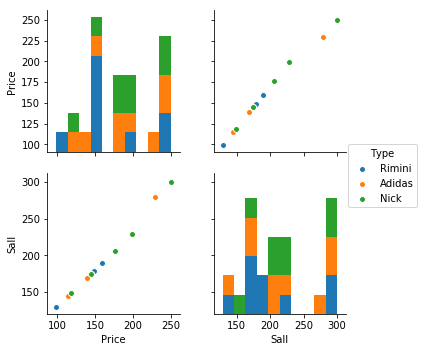

In [77]:
## Visualization Data ##
sns.pairplot(df_fin_data, hue='Type', size=2.5)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


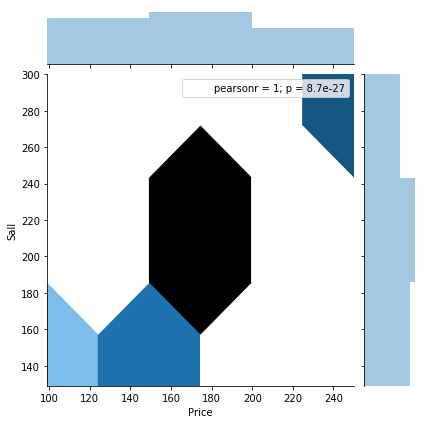

In [78]:
sns.jointplot("Price", "Sall", data=df_fin_data, kind='hex')

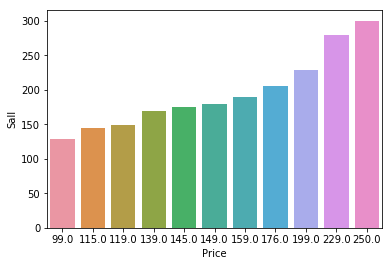

In [79]:
sns.barplot(x="Price", y="Sall", data=df_fin_data)

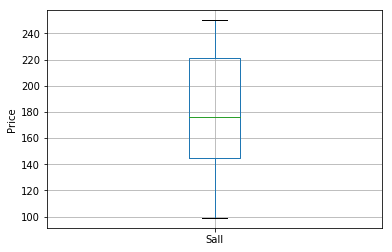

In [80]:
df_fin_data.boxplot(column='Price')
plt.grid(True, axis='y')
plt.ylabel('Price')
plt.xticks([1],['Sall'])
plt.show()

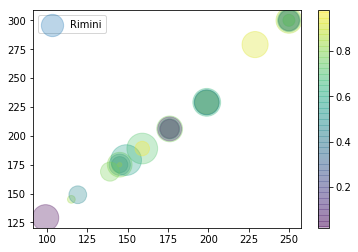

In [81]:
rng = np.random.RandomState(0)
colors = rng.rand(26)
marker_sizes = 1000 * rng.rand(100)
plt.scatter(df_fin_data.Price, df_fin_data.Sall, c=colors, s=marker_sizes, alpha=0.3)
plt.legend(df_fin_data.Type, loc='best')
plt.colorbar()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


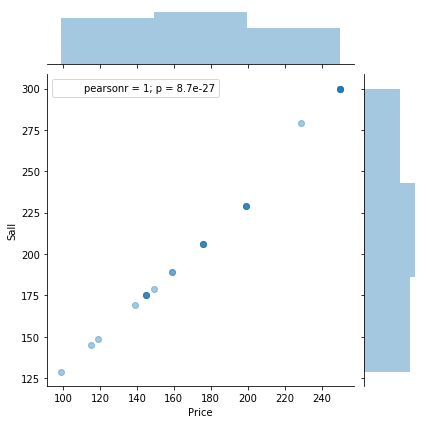

In [82]:
sns.jointplot(x='Price', y='Sall', data=df_fin_data, alpha=.4)

In [83]:
## Linear Regression ##
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from scipy import stats
from datetime import datetime
from sklearn import preprocessing

In [84]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
X = pd.DataFrame(df_fin_data['Price'])
y = pd.DataFrame(df_fin_data['Sall'])
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.987531564506512, 0.9942416431248665, 0.991574160263011]


In [86]:
X['Price'] = X.index
# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(X['Price'], prefix='Price', drop_first=True)
# Add all the columns to the model data
X = X.join(add_var)
# Drop the original column that was expanded
X.drop(columns=['Price'], inplace=True)
X.head()

,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7,Price_8,Price_9,Price_10,Price_11,...,Price_17,Price_18,Price_19,Price_20,Price_21,Price_22,Price_23,Price_24,Price_25,Price_26
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


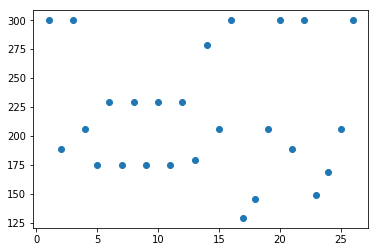

In [87]:
plt.scatter(x,y)

In [88]:
## Recommender ##
price_avg = df_fin_data.groupby('Type')['Price'].mean()
price_avg.head()

Type
Adidas    186.555556
Nick      189.250000
Rimini    172.777778
Name: Price, dtype: float64

In [89]:
price_count = df_fin_data.groupby('Type')['Price'].count().sort_values(ascending=False)
price_count.head()

Type
Rimini    9
Adidas    9
Nick      8
Name: Price, dtype: int64

In [90]:
price_mean_count = pd.DataFrame(price_avg)
price_mean_count['price_count']=price_count
price_mean_count.head()

,Price,price_count
Type,,
Adidas,186.555556,9
Nick,189.250000,8
Rimini,172.777778,9


In [91]:
price_mean_count.rename(columns={'Price':'price_avg'}, inplace=True)
price_mean_count.head()

,price_avg,price_count
Type,,
Adidas,186.555556,9
Nick,189.250000,8
Rimini,172.777778,9


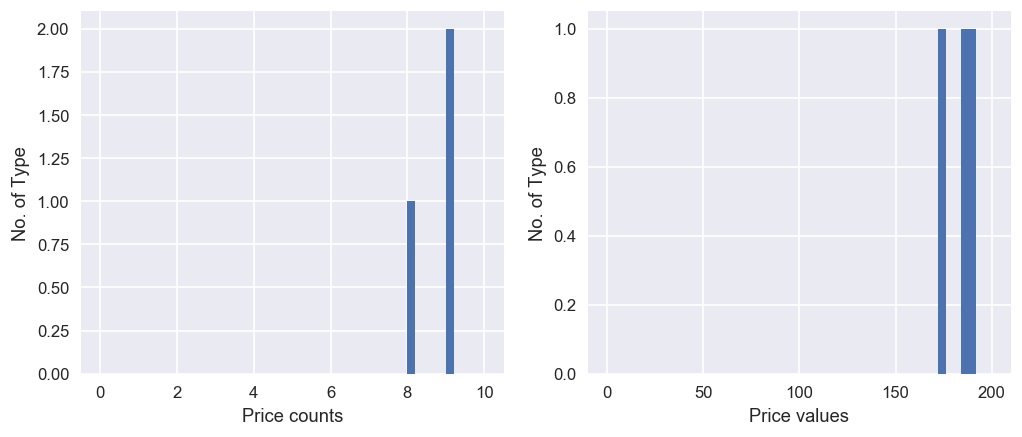

In [92]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), dpi = 120)
ax1.hist(price_mean_count['price_count'],bins=50, range=(0,10))
ax2.hist(price_mean_count['price_avg'],bins=50, range=(0,200))
ax1.set_ylabel('No. of Type')
ax1.set_xlabel('Price counts')
ax2.set_ylabel('No. of Type')
ax2.set_xlabel('Price values')
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_86\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


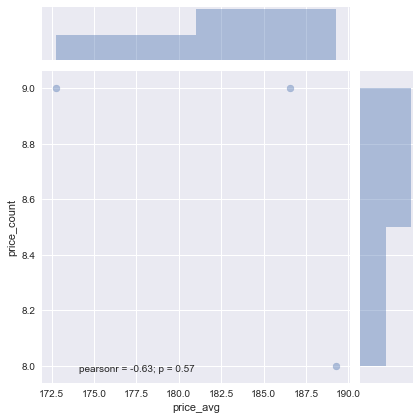

In [93]:
sns.jointplot(x='price_avg', y='price_count', data=price_mean_count, alpha=.4)

In [94]:
user_shoes_price = df_fin_data.pivot_table(index='ID', columns='Type', values='Price')
user_shoes_price.head()

Type,Adidas,Nick,Rimini
ID,,,
1,NaN,NaN,250.0
2,NaN,NaN,159.0
3,250.0,NaN,NaN
4,NaN,176.0,NaN
5,NaN,145.0,NaN


In [95]:
forrest_shoes_price = user_shoes_price['Adidas']
forrest_shoes_price.head(10)

ID
1       NaN
2       NaN
3     250.0
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9     145.0
10    199.0
Name: Adidas, dtype: float64

In [96]:
shoes_like_forest_price = pd.DataFrame(user_shoes_price.corrwith(forrest_shoes_price), columns=['Correlation'])
shoes_like_forest_price.head(10)

,Correlation
Type,
Adidas,1.0
Nick,NaN
Rimini,NaN


In [97]:
shoes_like_forest_price.dropna(inplace=True)
shoes_like_forest_price.head()

,Correlation
Type,
Adidas,1.0


In [98]:
shoes_like_forest_price.sort_values('Correlation', ascending=False).head()

,Correlation
Type,
Adidas,1.0


In [99]:
shoes_like_forest_price = shoes_like_forest_price.join(price_mean_count['price_count'])
shoes_like_forest_price.head()

,Correlation,price_count
Type,,
Adidas,1.0,9


In [100]:
recommended_shoes = shoes_like_forest_price[shoes_like_forest_price['price_count']>5].sort_values('Correlation', ascending=False)
recommended_shoes.head()

,Correlation,price_count
Type,,
Adidas,1.0,9
